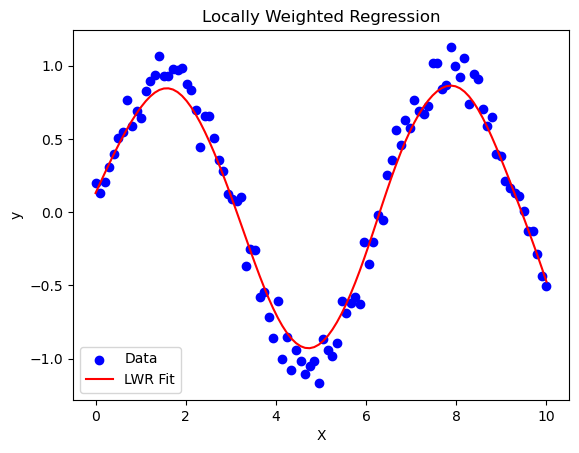

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    X = np.linspace(0, 10, 100)
    y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)
    return X, y

def locally_weighted_regression(X, y, tau, x_query):
    X_aug = np.vstack([np.ones(len(X)), X]).T
    W = np.exp(-(X - x_query) ** 2 / (2 * tau ** 2))
    theta = np.linalg.inv(X_aug.T @ (W[:, None] * X_aug)) @ X_aug.T @ (W * y)
    return np.array([1, x_query]) @ theta

X, y = generate_data()
tau = 0.5

X_pred = np.linspace(0, 10, 100)
y_pred = [locally_weighted_regression(X, y, tau, x) for x in X_pred]

plt.scatter(X, y, label="Data", color="blue")
plt.plot(X_pred, y_pred, label="LWR Fit", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Locally Weighted Regression")
plt.legend()
plt.show()
